# **Pemodelan Topik | Cyber University (BRI Institute)**

In [28]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
from gensim import corpora, models
import gensim
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import ast

# Baca dataset
df = pd.read_csv('../../../dataset/cleaned-data/CyberU_reviews_cleaned.csv')

# Konversi string representasi list menjadi list yang sebenarnya
df['tokenized_text'] = df['tokenized_text'].apply(ast.literal_eval)

In [46]:

# Buat Dictionary
dictionary = corpora.Dictionary(df['tokenized_text'])
print(dictionary)

Dictionary<109 unique tokens: ['1', 'ai', 'cek', 'cyberian', 'ga']...>


In [47]:


# Buat Corpus
corpus = [dictionary.doc2bow(text) for text in df['tokenized_text']]
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1)]]


In [31]:


# Fungsi untuk menghitung coherence score
def compute_coherence_values(dictionary, corpus, texts, start, limit, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               num_topics=num_topics, 
                                               id2word=dictionary,
                                               random_state=42,
                                               passes=15)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, 
                                      dictionary=dictionary, 
                                      coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

# Hitung coherence score untuk berbagai jumlah topik
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, 
                                                      corpus=corpus,
                                                      texts=df['tokenized_text'],
                                                      start=2, limit=11, step=1)

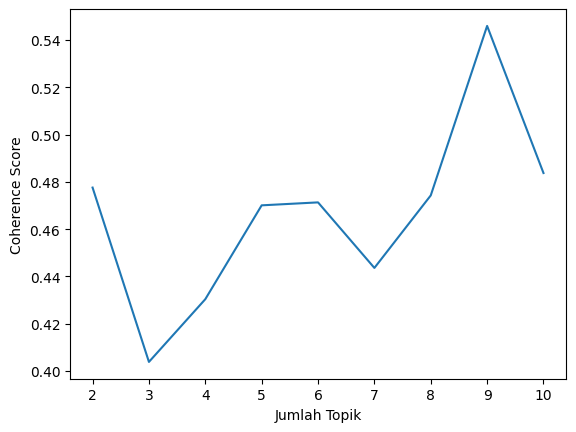

In [32]:
# Plot coherence scores
plt.plot(range(2, 11), coherence_values)
plt.xlabel("Jumlah Topik")
plt.ylabel("Coherence Score")
plt.show()

In [33]:
# Pilih model dengan coherence score terbaik
optimal_model = model_list[np.argmax(coherence_values)]

# Visualisasi dengan pyLDAvis
vis = pyLDAvis.gensim_models.prepare(optimal_model, corpus, dictionary)
pyLDAvis.save_html(vis, 'lda_visualization_CyberU.html')

# Buat wordcloud untuk setiap topik
def plot_word_cloud(model, topic_number):
    topic_words = dict(model.show_topic(topic_number, 30))
    wordcloud = WordCloud(width=800, height=400, 
                         background_color='white').generate_from_frequencies(topic_words)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Topik {topic_number+1}')
    plt.show()

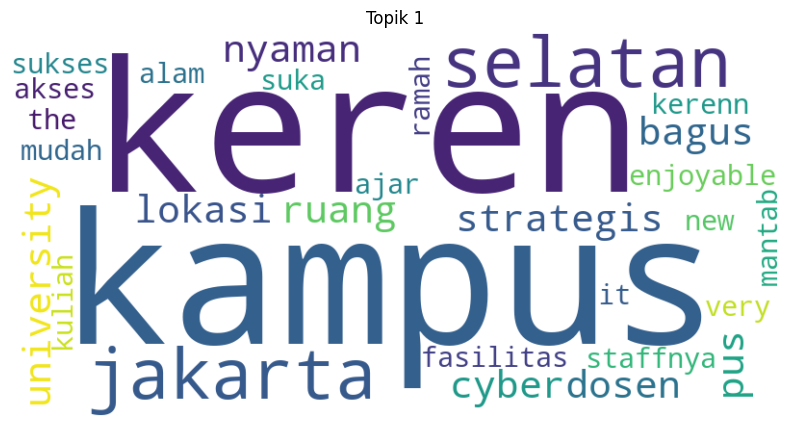

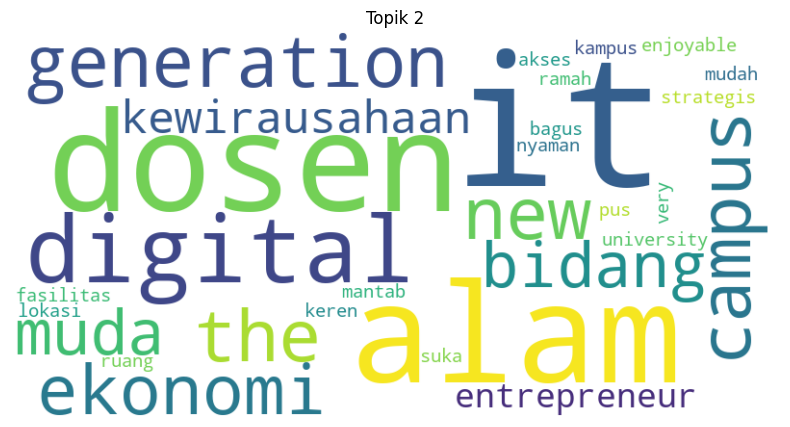

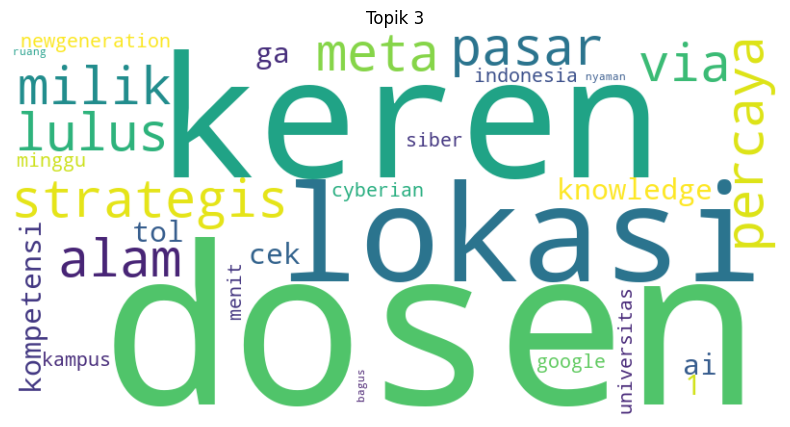

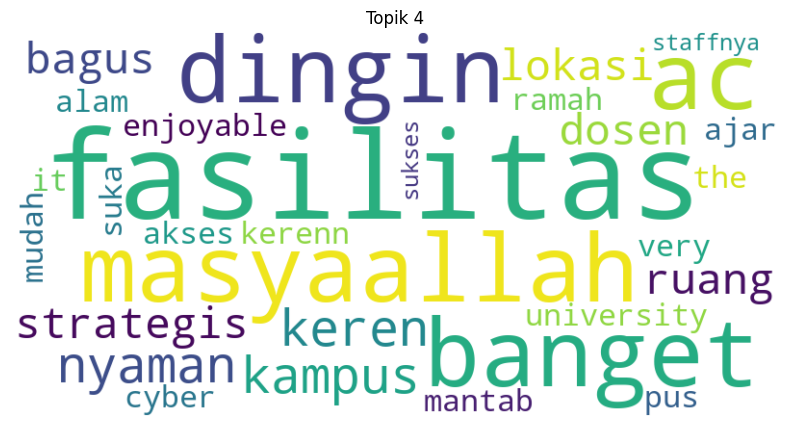

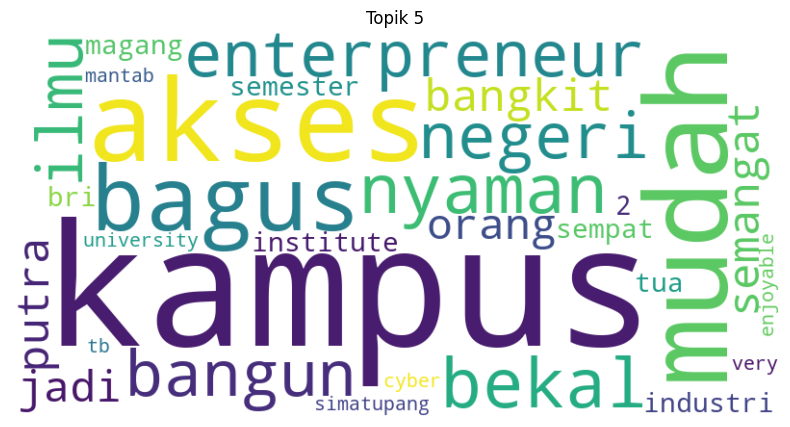

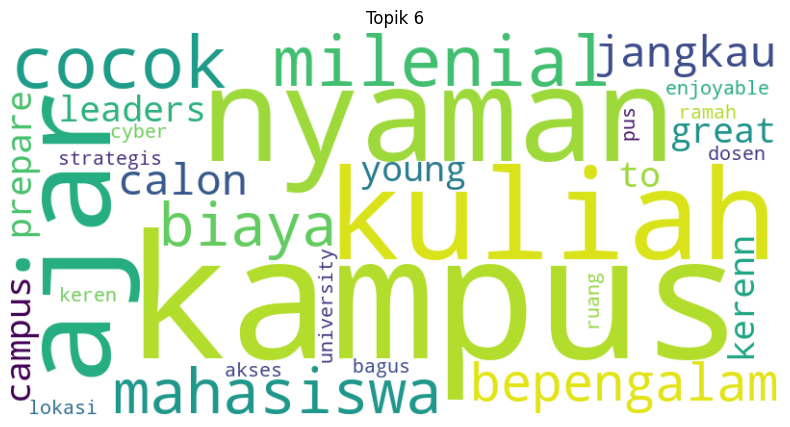

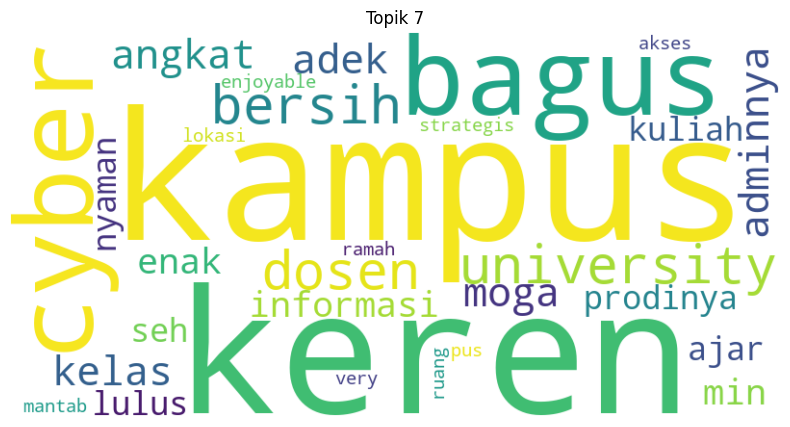

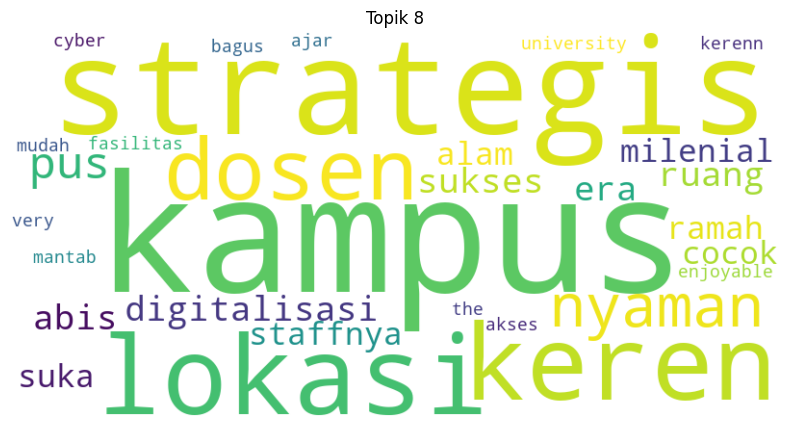

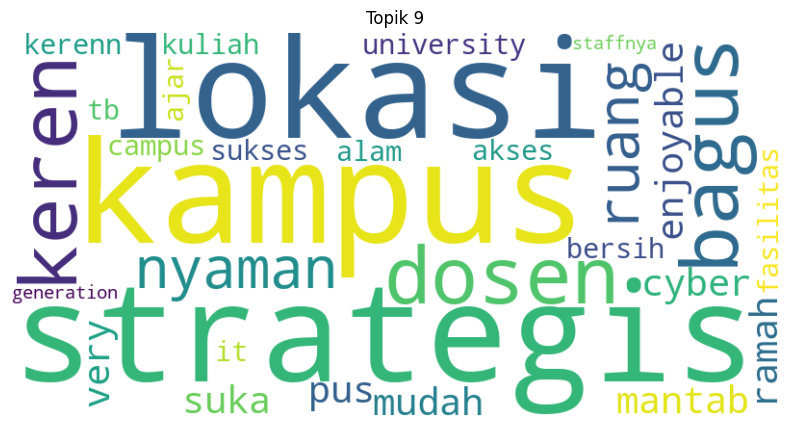

In [34]:
# Plot wordcloud untuk setiap topik
for i in range(optimal_model.num_topics):
    plot_word_cloud(optimal_model, i)

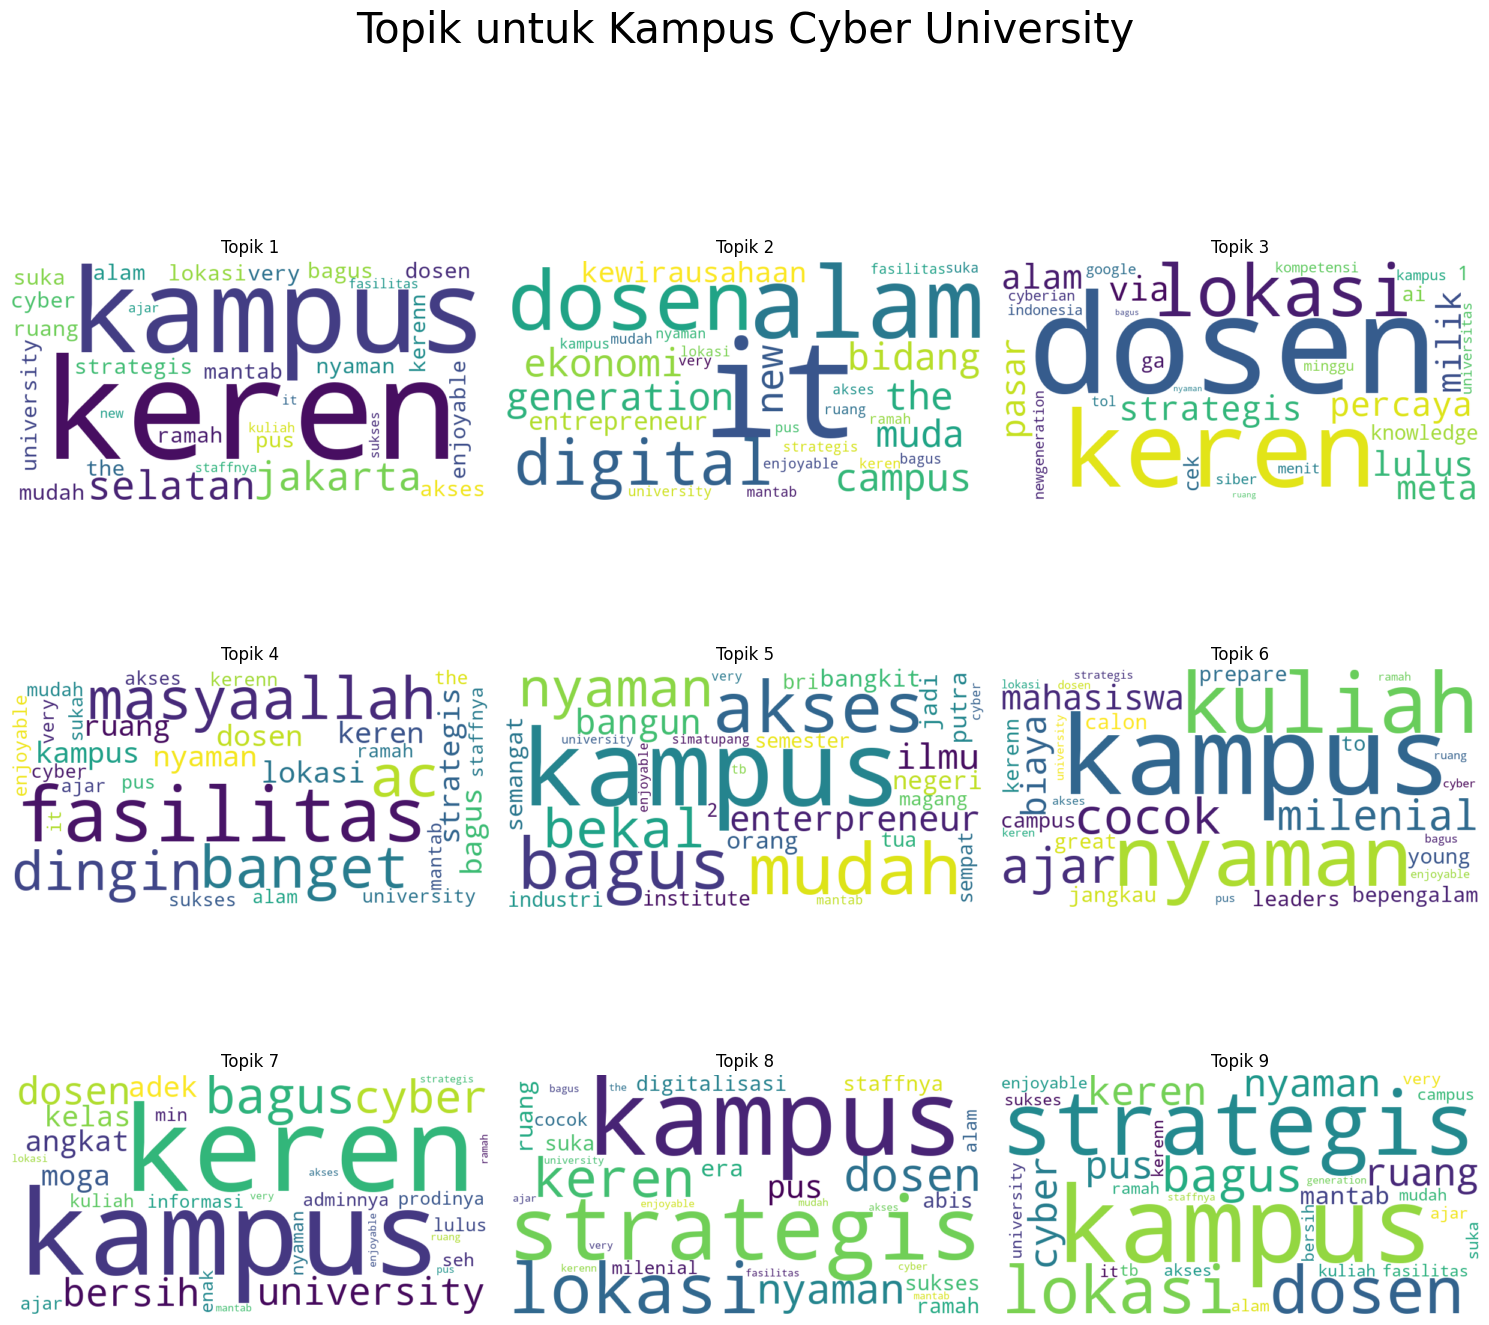

In [45]:
# Buat wordcloud untuk setiap topik dalam satu tampilan
fig, axes = plt.subplots(3, 3, figsize=(15, 15), sharex=True, sharey=True)
fig.suptitle('Topik untuk Kampus Cyber University', fontsize=30)

for i, ax in enumerate(axes.flatten()):
    if i < optimal_model.num_topics:
        topic_words = dict(optimal_model.show_topic(i, 30))
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_words)
        
        ax.imshow(wordcloud, interpolation='bilinear')
        ax.axis('off')
        ax.set_title(f'Topik {i+1}')
    else:
        ax.axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()